In [1]:
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
#Importing the dataset
df=pd.read_csv('IMDB_Dataset.csv')
df.head() #show first 5 values

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
#creating new column Sentiment, which has 1 and 0 values(change pozitive=1,negative=0)
df['Sentiment']=np.where(df['sentiment']=='positive',1,0)
#deleting sentiment column(ec. positive)
df.drop('sentiment',axis=1,inplace=True)
df.head()

,review,Sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [2]:
print("Number of (row,column) in dataset  : ",df.shape)

Number of (row,column) in dataset  :  (50000, 2)


In [4]:
#first review
print(df.review[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [5]:
import re
import nltk
from nltk.corpus import stopwords
#Setting English stopwords
stopwords_set = set(stopwords.words("english"))
#words simplification function
def sadelestirme(text):
    text = re.sub('<[^>].*?>', '',text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text=re.sub('[\W]+',' ',text.lower()) +\
       ' '.join(emoticons).replace('-','')    
    text = text.split()
    text = [word for word in text  if not word in stopwords_set ]  
    text = ' '.join(text)
    return text


In [6]:
sadelestirme('Hello world !!! :) example*only =Emre Eser:( . travelling for you are a very good morning to fishing *-!!')

'hello world example emre eser travelling good morning fishing :) :('

In [7]:
df['review']=df['review'].apply(sadelestirme)

In [8]:
#You can look first review again. It is too simple now
print(df.review[0])

one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skil

In [9]:
#Writing function for words visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def wordcloud_draw(data, color = 'black'):
    
    wordcloud = WordCloud(background_color=color,
                      width=2500,
                      height=2000
                     ).generate(str(data))
    plt.figure(1,figsize=(15, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()    

In [10]:
positiveReview=df[df['Sentiment']==1]
negativeReview=df[df['Sentiment']==0]
#return top 100 words with highest frequency
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    encok = wordlist.most_common(100)
    return encok

Bad review


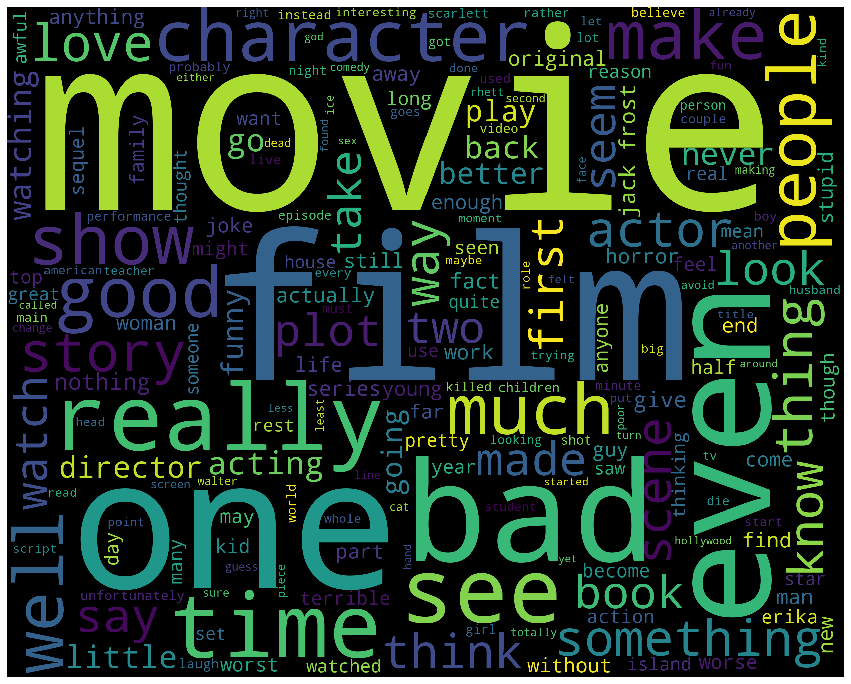

In [11]:
#word cloud for negative review words
print('Bad review')
wordcloud_draw(get_word_features(negativeReview['review']))

Good review


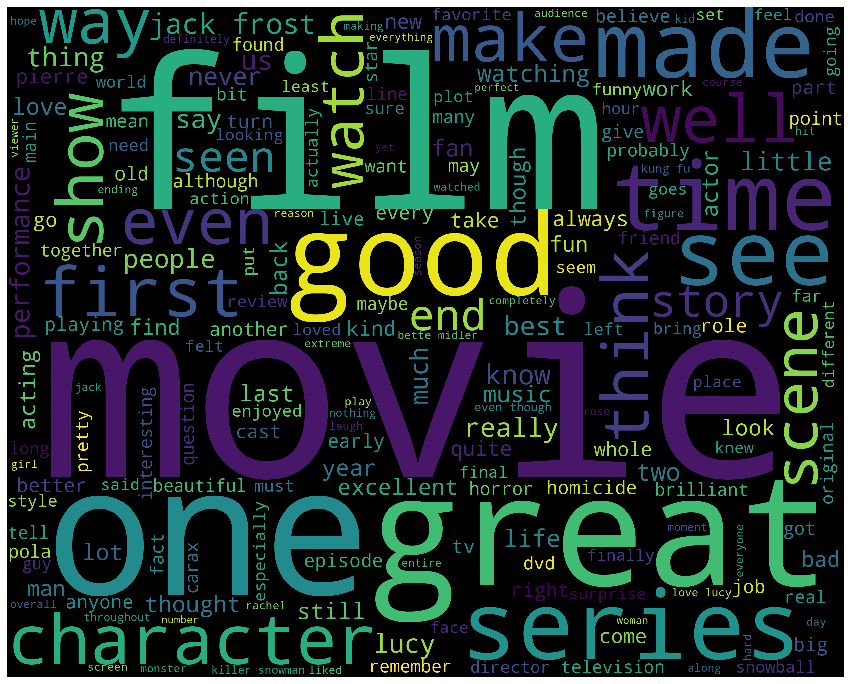

In [12]:
#word cloud for positive review words
print('Good review')
wordcloud_draw(get_word_features(positiveReview['review']))

In [13]:
#stemming process
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [14]:
#writing function 
def tokenizer_stem(text):
    return [porter.stem(word) for word in text.split()]

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer 
#words vectorisation (TF-IDF)
tfidf=TfidfVectorizer(strip_accents=None,
                     lowercase=False,
                     preprocessor=None,
                     tokenizer=tokenizer_stem,
                     use_idf=True,
                     norm='l2',
                     smooth_idf=True)

y=df.Sentiment.values
X=tfidf.fit_transform(df.review)

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [20]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred= classifier.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.895

In [22]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)
# Predicting the Test set results
y_pred2 = classifier2.predict(X_test)
accuracy_score(y_test, y_pred2)

0.7172

In [23]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)
# Predicting the Test set results
y_pred3= classifier3.predict(X_test)
accuracy_score(y_test, y_pred3)

0.7818

In [24]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier4.fit(X_train, y_train)
# Predicting the Test set results
y_pred4 = classifier4.predict(X_test)
accuracy_score(y_test, y_pred4)

0.7864